In [385]:
import numpy as np
import matplotlib.pyplot as plt

In [430]:
#Getting Data
data = np.genfromtxt('Image1.txt', delimiter = ',')
np.random.shuffle(data)
x = data[:, (0,1)]
y = data[:, 2]
x_ = data[9990:, (0,1)]
y_ = data[9990:, 2] - 1
y = y.reshape(10000,1)
m = len(y)
n = len(np.unique(y))
p = int(np.min(np.unique(y)))
Y = np.zeros((m, n))
class_code = np.zeros((k,1))
for i in range(len(y)):
    Y[i][int(y[i]) - 1] = 1
k = 5

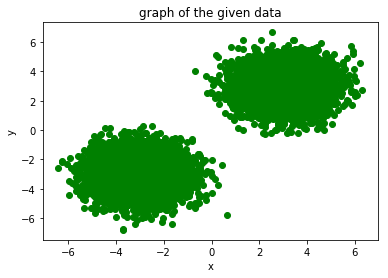

In [431]:
def graphPlotting(x):
    plt.scatter(x[:,0], x[:,1], c = 'green')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("graph of the given data")
    plt.show()
graphPlotting(x)   

In [432]:
def euclideanDistance(x, point):
    
    distance =  np.sqrt(np.sum((x - point)**2, axis = 1))        
    return distance

In [433]:
def k_neighbors(point, k):
       
    euc_dist = euclideanDistance(x, point)
    neighbors = Y[np.argsort(euc_dist)]
    k_nearest_neighbors = neighbors[:k]
    return k_nearest_neighbors

In [434]:
def class_matrix(k, n, p,point):
    
    knn = k_neighbors(point, k)
    for i in range(k):
        for j in range(n):
            if(knn[i][j] == 1):
                class_code[i] = j 
    return class_code

In [435]:
def class_of_point(k, n, p, count):
    b = class_matrix(k, n, p,count)
    a = np.ravel(b)
    counts = np.bincount(a.astype(int))
    return np.argmax(counts)

In [436]:
def predict(x_):
    y_pred = np.zeros(len(x_))
    for i in range(len(x_)):
        y_pred[i] = class_of_point(k, n, p, x_[i])
    return y_pred

In [447]:
def accuracy(x_):
    y_pred = predict(x_)
    acc = y_pred - y_
    accuracy = np.count_nonzero(acc == 0)/len(y_pred) * 100 
    return accuracy

In [448]:
print(accuracy(x_))

100.0
